In [1]:
!kaggle datasets download mysarahmadbhat/lung-cancer

Dataset URL: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer
License(s): CC0-1.0
  0% 0.00/2.00k [00:00<?, ?B/s]
100% 2.00k/2.00k [00:00<00:00, 1.42MB/s]


In [2]:
!unzip lung-cancer.zip -d data

Archive:  lung-cancer.zip
  inflating: data/survey lung cancer.csv  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/survey lung cancer.csv')

In [5]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
df.isna().sum().sum()

0

In [7]:
df.duplicated().sum()

33

In [8]:
# remove duplicated
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
df.head(10)

# we need convert gender to number and scale age value

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


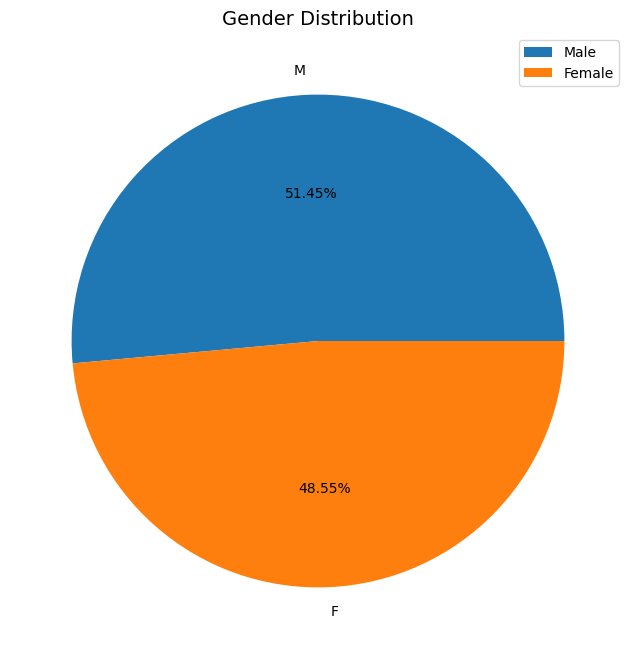

In [10]:
gen_count=df["GENDER"].value_counts()
plt.figure(figsize=(10,8))
values=gen_count.values
labels=gen_count.index
plt.pie(values,labels=labels,autopct='%1.2f%%')
plt.title("Gender Distribution",fontsize='14')
plt.legend(["Male","Female"])
plt.show()

Text(0.5, 1.0, 'Gender Vs. Lung Cancer')

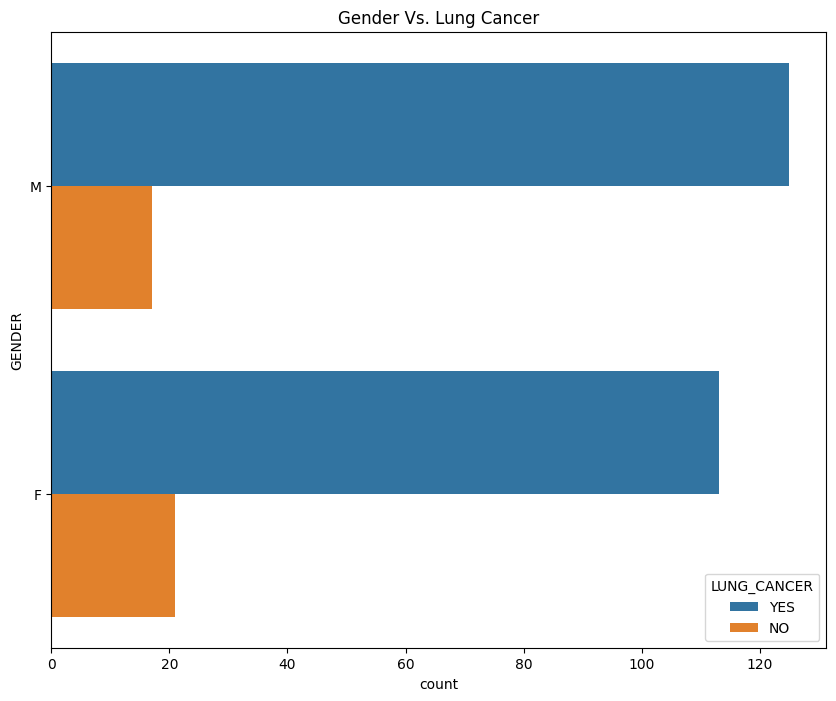

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,y="GENDER",hue="LUNG_CANCER")
plt.title("Gender Vs. Lung Cancer")

In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df['GENDER'] = df['GENDER'].map({'F': 0, 'M': 1})

# scaler = MinMaxScaler()
# df['AGE'] = scaler.fit_transform(df[['AGE']])

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [13]:
lung_key = {'YES' : 1, 'NO' : 0}

df['LUNG_CANCER'] = df['LUNG_CANCER'].map(lung_key)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


<Axes: >

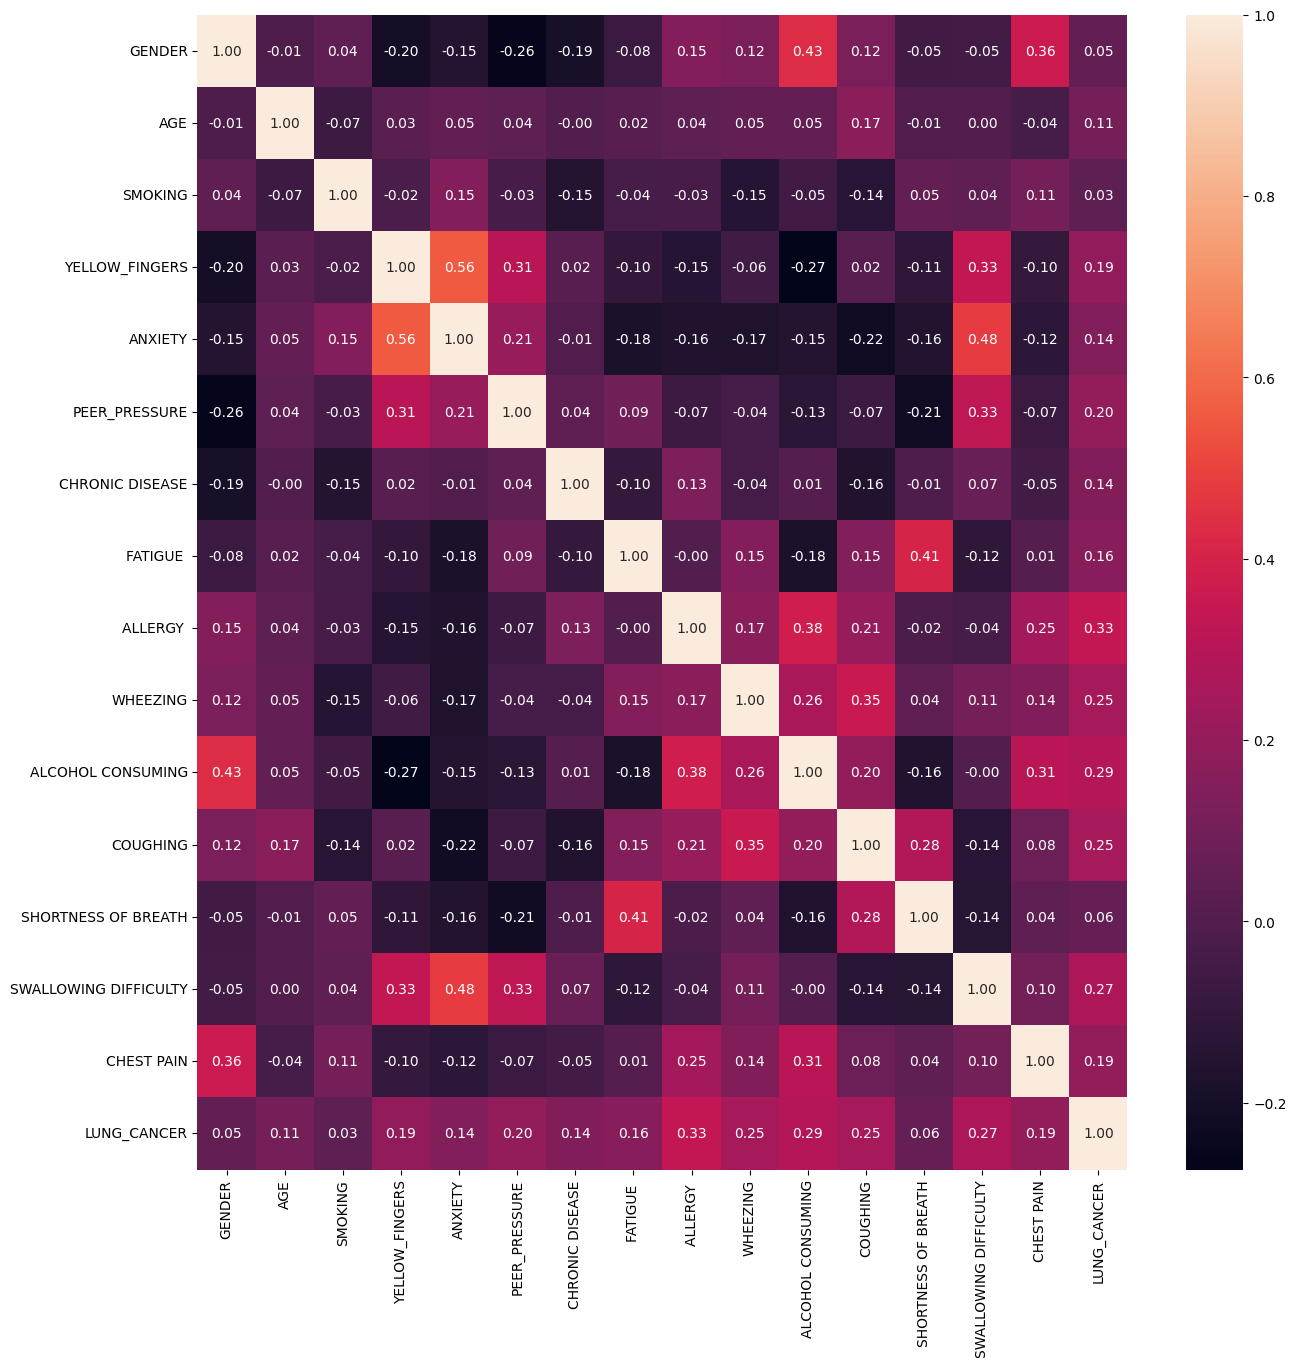

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='0.2f')

In [15]:
# split data
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1])

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
age_index = 1

X_train_age = X_train[:, age_index].reshape(-1, 1)
X_test_age = X_test[:, age_index].reshape(-1, 1)


In [18]:
X_train[:, age_index]

array([60, 38, 67, 55, 62, 59, 56, 65, 75, 77, 71, 66, 69, 62, 62, 73, 59,
       56, 68, 58, 71, 52, 62, 72, 52, 67, 74, 56, 55, 72, 73, 59, 47, 72,
       62, 55, 67, 64, 64, 77, 56, 55, 63, 57, 59, 78, 60, 59, 61, 76, 69,
       79, 55, 61, 54, 58, 71, 71, 61, 58, 55, 56, 65, 67, 62, 57, 75, 56,
       63, 72, 72, 67, 71, 67, 60, 74, 60, 59, 53, 64, 59, 63, 60, 70, 65,
       63, 64, 77, 63, 61, 87, 64, 44, 69, 64, 64, 56, 61, 64, 60, 60, 69,
       59, 54, 72, 59, 71, 69, 55, 63, 53, 56, 70, 63, 57, 56, 62, 70, 54,
       61, 59, 62, 68, 64, 74, 70, 64, 68, 68, 51, 47, 60, 78, 70, 54, 60,
       60, 67, 64, 48, 49, 68, 75, 52, 70, 64, 70, 63, 60, 49, 56, 74, 63,
       60, 60, 61, 58, 55, 59, 69, 51, 72, 74, 77, 68, 71, 81, 61, 54, 55,
       68, 58, 69, 67, 71, 57, 56, 67, 46, 67, 64, 77, 70, 68, 57, 53, 56,
       64, 64, 59, 51, 69, 77, 69, 59, 56, 47, 62, 70, 62, 59, 58, 64, 68,
       63, 70, 74, 76, 64, 81, 62, 70, 70, 60, 44, 55, 66, 49, 77, 72])

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_age_scaled = scaler.fit_transform(X_train_age)
X_test_age_scaled = scaler.transform(X_test_age)

X_train[:, age_index] = X_train_age_scaled.flatten()
X_test[:, age_index] = X_test_age_scaled.flatten()

In [20]:
from keras.models import Sequential
from keras.layers import Dense , Input , Dropout

In [21]:
X_train.shape

(220, 15)

In [54]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'] )

model.fit(X_train,y_train, epochs= 10, batch_size = 4)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6453 - loss: 0.6194
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8798 - loss: 0.3583
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9140 - loss: 0.2844
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9174 - loss: 0.2676
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9001 - loss: 0.3034
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9025 - loss: 0.2951
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8777 - loss: 0.3488
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8801 - loss: 0.3372
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8661 - loss: 0.3630
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8822 - loss: 0.3268


In [55]:
_,accuracy = model.evaluate(X_test,y_test, verbose = 0)
print(f'Model Accuracy : {round(accuracy*100)}%')

Model Accuracy : 79%


In [62]:
model1 = Sequential()
model1.add(Input(shape=(X_train.shape[1],)))
model1.add(Dense(10, activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(5, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

model1.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'] )

model1.fit(X_train,y_train, epochs= 10,batch_size = 4)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5372 - loss: 0.6865
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8983 - loss: 0.3663
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8787 - loss: 0.3714
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8643 - loss: 0.4024
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8739 - loss: 0.4000
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9047 - loss: 0.3374
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8630 - loss: 0.3809
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8870 - loss: 0.3776
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8975 - loss: 0.3232
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8887 - loss: 0.3356


In [63]:
_,accuracy = model1.evaluate(X_test,y_test, verbose = 0)
print(f'Model Accuracy : {round(accuracy*100)}%')

Model Accuracy : 79%


In [60]:
model2 = Sequential()
model2.add(Input(shape=(X_train.shape[1],)))
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

model2.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'] )

model2.fit(X_train,y_train, epochs= 10)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.1609 - loss: 1.6776
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6103 - loss: 0.6494  
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8626 - loss: 0.4155 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8475 - loss: 0.4042 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8602 - loss: 0.3892 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8889 - loss: 0.3311 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8792 - loss: 0.3453 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8805 - loss: 0.3360 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8893 - loss: 0.3128 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8755 - loss: 0.3402 


In [61]:
_,accuracy = model2.evaluate(X_test,y_test, verbose = 0)
print(f'Model Accuracy : {round(accuracy*100)}%')

Model Accuracy : 79%
